In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import itertools
from scipy.stats import pearsonr

from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Reproduce Carrabin Fig 3

In [5]:
human = pd.read_pickle("data/carrabin.pkl")
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")

In [5]:
human['bayes'] = bayes['response']
bayes['bayes'] = bayes['response']
combined = pd.concat([human, bayes], ignore_index=True)

In [6]:
combined

,type,sid,trial,stage,color,response,delta response,bayes
0,human,1,1,1,1,0.500000,0.500,0.333333
1,human,1,1,2,-1,0.000000,0.500,0.000000
2,human,1,1,3,-1,-0.500000,0.500,-0.200000
3,human,1,1,4,-1,-0.598000,0.098,-0.333333
4,human,1,1,5,-1,-0.800000,0.202,-0.428571
...,...,...,...,...,...,...,...,...
41505,bayes,21,200,1,1,0.333333,NaN,0.333333
41506,bayes,21,200,2,1,0.500000,NaN,0.500000
41507,bayes,21,200,3,1,0.600000,NaN,0.600000
41508,bayes,21,200,4,1,0.666667,NaN,0.666667


/tmp/ipykernel_5992/3530315094.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)


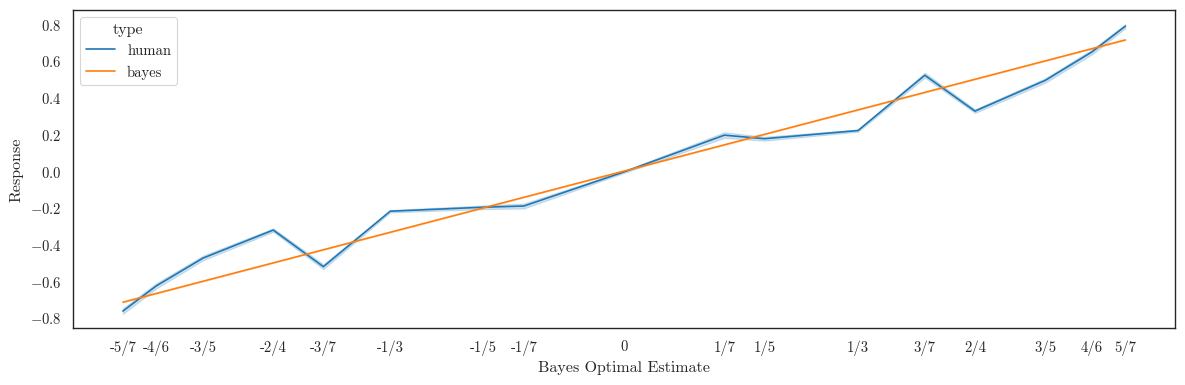

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
# labels = ['1/7', '1/6', '1/5', '1/4', '2/7', '1/3', '2/5', '3/7', '1/2', '4/7', '3/5', '2/3', '5/7', '3/4', '4/5', '5/6', '6/7']
xticks = [-5/7, -4/6, -3/5, -2/4, -3/7, -1/3, -1/5, -1/7, 0, 1/7, 1/5, 1/3, 3/7, 2/4, 3/5, 4/6, 5/7]
labels = ['-5/7', '-4/6', '-3/5', '-2/4', '-3/7', '-1/3', '-1/5', '-1/7', '0', '1/7', '1/5', '1/3', '3/7', '2/4', '3/5', '4/6', '5/7']
sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)
ax.set(xlabel='Bayes Optimal Estimate', xticks=xticks, xticklabels=labels, ylabel='Response')
plt.tight_layout()
plt.show()

### RMSE

/tmp/ipykernel_13547/3030975494.py:10: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(combined, x='type', y='RMSE', hue='type', ax=ax, palette=palette, notch=False, width=0.5)


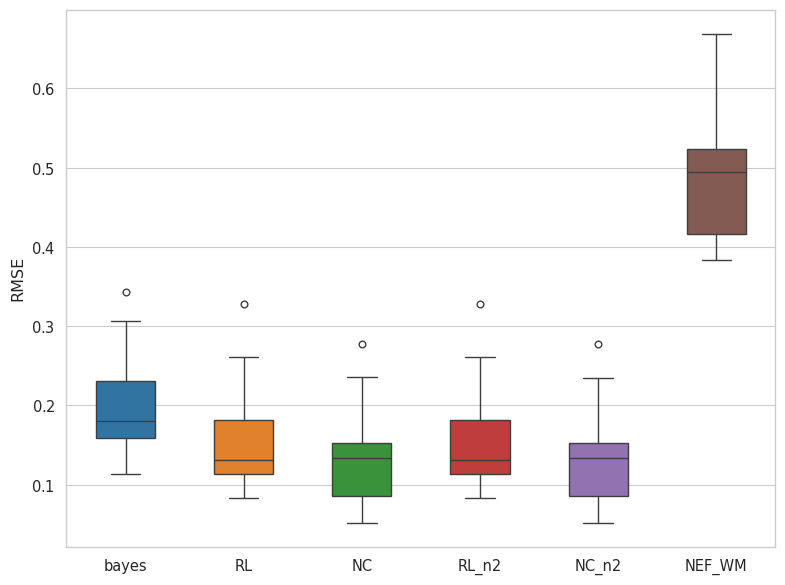

In [2]:
bayes = pd.read_pickle("data/bayes_jan24_performance.pkl")
rl = pd.read_pickle("data/RL_jan27_performance.pkl")
nc = pd.read_pickle("data/NC_jan27_performance.pkl")
rl_n = pd.read_pickle("data/RL_n2_jan28two_performance.pkl")
nc_n = pd.read_pickle("data/NC_n2_jan28two_performance.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_jan29_performance.pkl")
combined = pd.concat([bayes, rl, nc, rl_n, nc_n, nef_wm], ignore_index=True)
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='RMSE', hue='type', ax=ax, palette=palette, notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='RMSE') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_RMSE.jpg", dpi=600)

In [3]:
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_jan29_dynamics.pkl")
print(nef_wm)

         type  sid  trial  stage  color  response  delta response
0      NEF_WM    1      1      1      1  0.945966        0.945966
1      NEF_WM    1      1      2     -1  0.089274        0.856692
2      NEF_WM    1      1      3     -1 -0.255699        0.344973
3      NEF_WM    1      1      4     -1 -0.432736        0.177037
4      NEF_WM    1      1      5     -1 -0.538052        0.105316
...       ...  ...    ...    ...    ...       ...             ...
20750  NEF_WM   21    200      1      1  0.959218        0.959218
20751  NEF_WM   21    200      2      1  0.949826        0.009393
20752  NEF_WM   21    200      3      1  0.951530        0.001704
20753  NEF_WM   21    200      4      1  0.959840        0.008310
20754  NEF_WM   21    200      5      1  0.949398        0.010442

[20755 rows x 7 columns]


In [6]:
print(human)

        type  sid  trial  stage  color  response  delta response
0      human    1      1      1      1     0.500           0.500
1      human    1      1      2     -1     0.000           0.500
2      human    1      1      3     -1    -0.500           0.500
3      human    1      1      4     -1    -0.598           0.098
4      human    1      1      5     -1    -0.800           0.202
...      ...  ...    ...    ...    ...       ...             ...
20750  human   21    200      1      1     0.122           0.122
20751  human   21    200      2      1     0.312           0.190
20752  human   21    200      3      1     0.508           0.196
20753  human   21    200      4      1     0.692           0.184
20754  human   21    200      5      1     0.858           0.166

[20755 rows x 7 columns]


### Response bias vs bayes

/tmp/ipykernel_105080/2025972337.py:22: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=human, x='bayes', y='bias', hue='stage', ax=axes[0][0], palette=palette)
/tmp/ipykernel_105080/2025972337.py:23: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=bayes, x='bayes', y='bias', hue='stage', ax=axes[1][0], palette=palette)
/tmp/ipykernel_105080/2025972337.py:24: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=rl, x='bayes', y='bias', hue='stage', ax=axes[2][0], palette=palette)
/tmp/ipykernel_105080/2025972337.py:25: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=nc, x='bayes', y='bias', hue='stage', ax=axes[3][0], palette=palette)
/tmp/ipykernel_105080/2025972337.py:26: UserWarning: The palette list has more values (10) tha

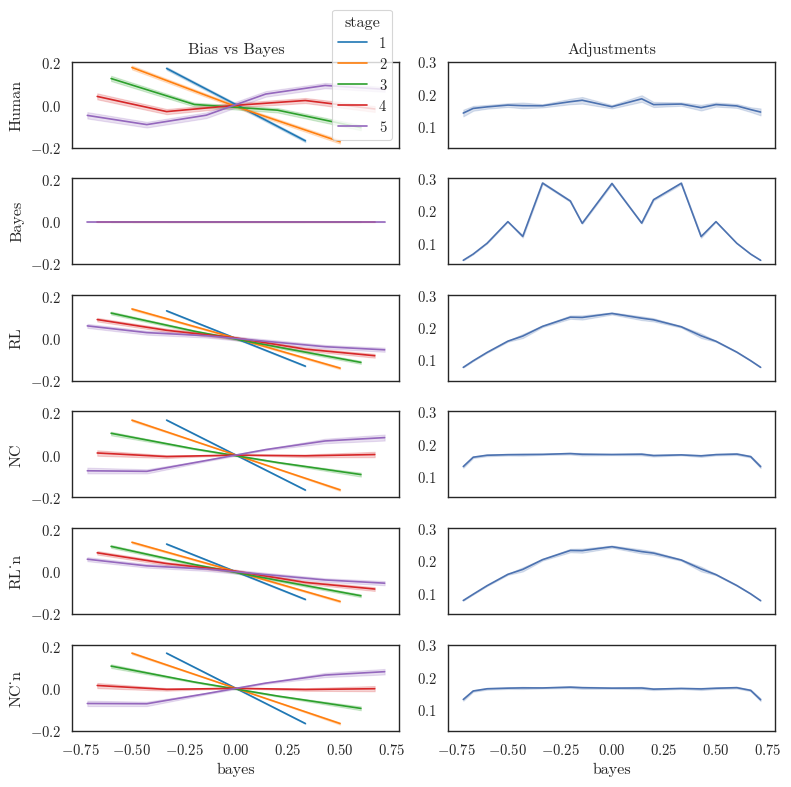

In [10]:
human = pd.read_pickle("data/carrabin.pkl")
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")
rl = pd.read_pickle("data/RL_jan27_dynamics.pkl")
nc = pd.read_pickle("data/NC_jan27_dynamics.pkl")
rl_n = pd.read_pickle("data/RL_n2_jan28two_dynamics.pkl")
nc_n = pd.read_pickle("data/NC_n2_jan28two_dynamics.pkl")

human['bayes'] = bayes['response']
human['bias'] = human['response'] - human['bayes']
bayes['bayes'] = human['bayes']
bayes['bias'] = bayes['response'] - bayes['response']
rl['bayes'] = human['bayes']
rl['bias'] = rl['response'] - human['bayes']
nc['bayes'] = human['bayes']
nc['bias'] = nc['response'] - human['bayes']
rl_n['bayes'] = human['bayes']
rl_n['bias'] = rl_n['response'] - human['bayes']
nc_n['bayes'] = human['bayes']
nc_n['bias'] = nc_n['response'] - human['bayes']

fig, axes = plt.subplots(nrows=6, ncols=2, sharex=True, sharey='col', figsize=(8,8))
sns.lineplot(data=human, x='bayes', y='bias', hue='stage', ax=axes[0][0], palette=palette)
sns.lineplot(data=bayes, x='bayes', y='bias', hue='stage', ax=axes[1][0], palette=palette)
sns.lineplot(data=rl, x='bayes', y='bias', hue='stage', ax=axes[2][0], palette=palette)
sns.lineplot(data=nc, x='bayes', y='bias', hue='stage', ax=axes[3][0], palette=palette)
sns.lineplot(data=rl_n, x='bayes', y='bias', hue='stage', ax=axes[4][0], palette=palette)
sns.lineplot(data=nc_n, x='bayes', y='bias', hue='stage', ax=axes[5][0], palette=palette)
sns.lineplot(data=human, x='bayes', y='delta response', ax=axes[0][1], palette=palette)
sns.lineplot(data=bayes, x='bayes', y='delta response', ax=axes[1][1], palette=palette)
sns.lineplot(data=rl, x='bayes', y='delta response', ax=axes[2][1], palette=palette)
sns.lineplot(data=nc, x='bayes', y='delta response', ax=axes[3][1], palette=palette)
sns.lineplot(data=rl_n, x='bayes', y='delta response', ax=axes[4][1], palette=palette)
sns.lineplot(data=nc_n, x='bayes', y='delta response', ax=axes[5][1], palette=palette)
axes[0][0].set(ylabel='Human', title='Bias vs Bayes')
axes[1][0].set(ylabel='Bayes')
axes[2][0].set(ylabel='RL')
axes[3][0].set(ylabel='NC')
axes[4][0].set(ylabel='RL_n')
axes[5][0].set(ylabel='NC_n')
axes[0][1].set(ylabel=None, title='Adjustments')
axes[1][1].set(ylabel=None)
axes[2][1].set(ylabel=None)
axes[3][1].set(ylabel=None)
axes[4][1].set(ylabel=None)
axes[5][1].set(ylabel=None)
axes[1][0].get_legend().remove()
axes[2][0].get_legend().remove()
axes[3][0].get_legend().remove()
axes[4][0].get_legend().remove()
axes[5][0].get_legend().remove()
plt.tight_layout()
plt.show()

### Break down by SID

/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-lea

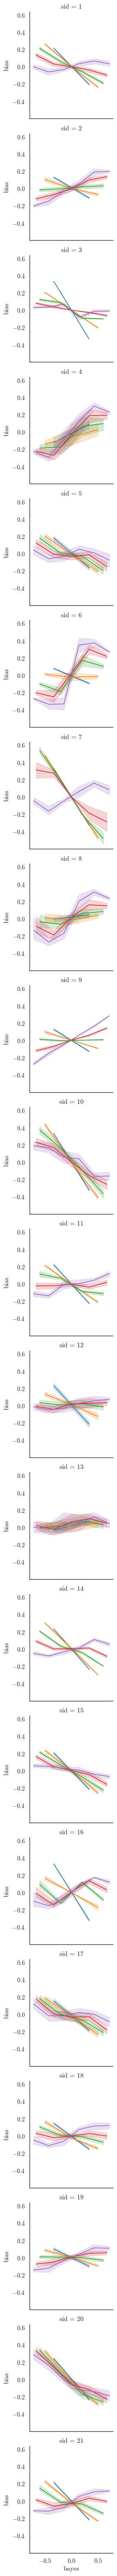

In [14]:
g = sns.FacetGrid(human, row="sid")
g.map_dataframe(sns.lineplot, x='bayes', y='bias', hue='stage', palette=palette)

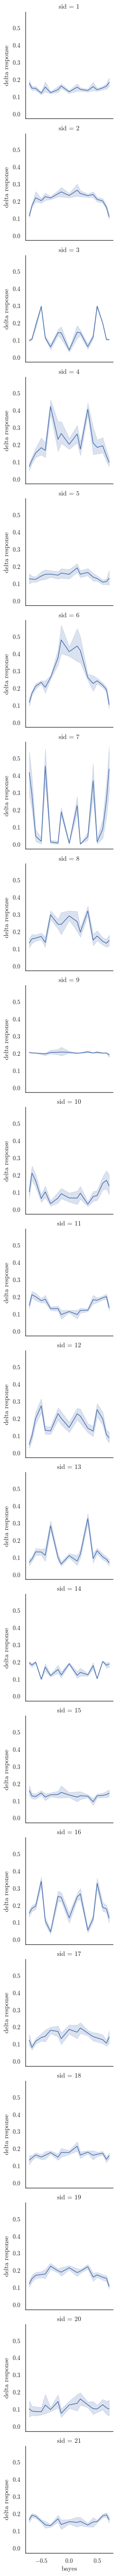

In [15]:
g = sns.FacetGrid(human, row="sid")
g.map_dataframe(sns.lineplot, x='bayes', y='delta response')

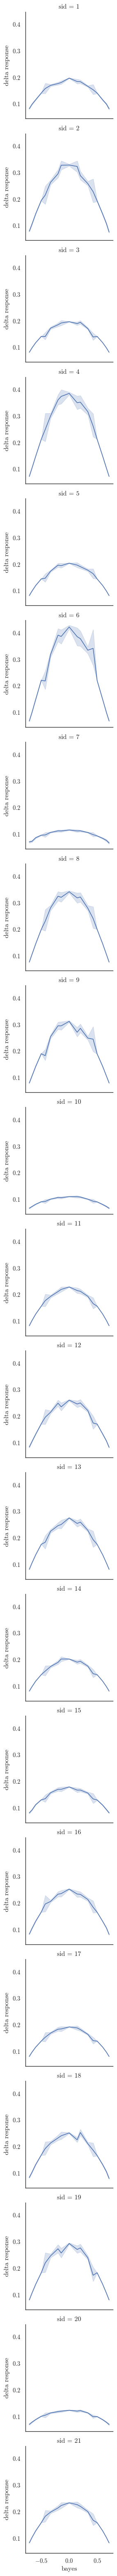

In [16]:
g = sns.FacetGrid(rl_n, row="sid")
g.map_dataframe(sns.lineplot, x='bayes', y='delta response')

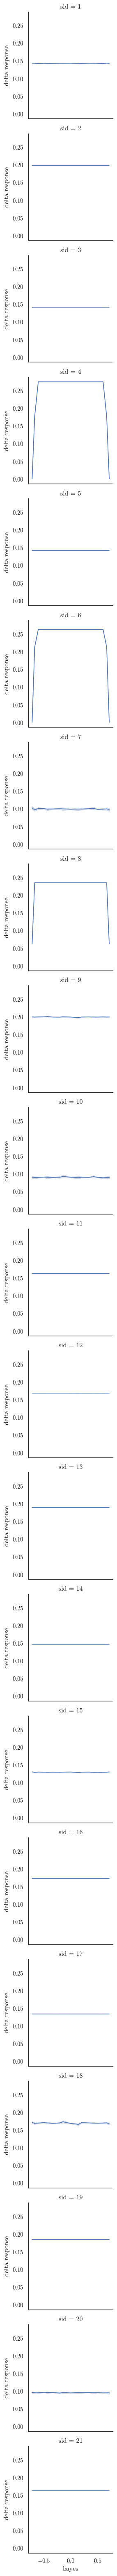

In [17]:
g = sns.FacetGrid(nc_n, row="sid")
g.map_dataframe(sns.lineplot, x='bayes', y='delta response')

### Autocorrelation

In [4]:
def array_to_binary(arr):
    arr = (arr == 1).astype(int)
    binary_str = ''.join(arr.astype(str))
    return binary_str

In [5]:
combined = pd.concat([human, bayes, rl, nc, rl_n, nc_n], ignore_index=True)
dfs = []
columns = ['type', 'sid', 'qid', 'mean estimate']
for mt in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(mt, sid)
        seq_dict = {}
        for stage in range(1, 6):
            sequences = np.array(list(itertools.product([1,-1], repeat=stage)))
            for seq in sequences:
                qid = array_to_binary(seq)
                seq_dict[qid] = []
        for trial in combined.query("type==@mt & sid==@sid")['trial'].unique():
            for stage in combined.query("type==@mt & sid==@sid & trial==@trial")['stage'].unique():
                sequence = combined.query("type==@mt & sid==@sid & trial==@trial & stage<=@stage")['color'].to_numpy()
                estimate = combined.query("type==@mt & sid==@sid & trial==@trial & stage==@stage")['response'].to_numpy()[0]
                qid = array_to_binary(sequence)
                seq_dict[qid].append(estimate)
                # print(sid, trial, stage, sequence, qid)
        for qid, seq in seq_dict.items():
            if len(seq)>0:
                dfs.append(pd.DataFrame([[mt, sid, qid, np.mean(seq)]], columns=columns))
avg_estimates = pd.concat(dfs, ignore_index=True)
avg_estimates.to_pickle("data/avg_estimates.pkl")

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
bayes 1
bayes 2
bayes 3
bayes 4
bayes 5
bayes 6
bayes 7
bayes 8
bayes 9
bayes 10
bayes 11
bayes 12
bayes 13
bayes 14
bayes 15
bayes 16
bayes 17
bayes 18
bayes 19
bayes 20
bayes 21
RL 1
RL 2
RL 3
RL 4
RL 5
RL 6
RL 7
RL 8
RL 9
RL 10
RL 11
RL 12
RL 13
RL 14
RL 15
RL 16
RL 17
RL 18
RL 19
RL 20
RL 21
NC 1
NC 2
NC 3
NC 4
NC 5
NC 6
NC 7
NC 8
NC 9
NC 10
NC 11
NC 12
NC 13
NC 14
NC 15
NC 16
NC 17
NC 18
NC 19
NC 20
NC 21
RL_n2 1
RL_n2 2
RL_n2 3
RL_n2 4
RL_n2 5
RL_n2 6
RL_n2 7
RL_n2 8
RL_n2 9
RL_n2 10
RL_n2 11
RL_n2 12
RL_n2 13
RL_n2 14
RL_n2 15
RL_n2 16
RL_n2 17
RL_n2 18
RL_n2 19
RL_n2 20
RL_n2 21
NC_n2 1
NC_n2 2
NC_n2 3
NC_n2 4
NC_n2 5
NC_n2 6
NC_n2 7
NC_n2 8
NC_n2 9
NC_n2 10
NC_n2 11
NC_n2 12
NC_n2 13
NC_n2 14
NC_n2 15
NC_n2 16
NC_n2 17
NC_n2 18
NC_n2 19
NC_n2 20
NC_n2 21


In [6]:
combined = pd.concat([human, bayes, rl, nc, rl_n, nc_n], ignore_index=True)
dfs = []
columns = ['type', 'sid', 'qid', 'stage', 'excursion', 'previous excursion']
for mt in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(mt, sid)
        for trial in combined.query("type==@mt & sid==@sid")['trial'].unique():
            excursion_old = None
            for stage in combined.query("type==@mt & sid==@sid & trial==@trial")['stage'].unique():
                sequence = combined.query("type==@mt & sid==@sid & trial==@trial & stage<=@stage")['color'].to_numpy()
                estimate = combined.query("type==@mt & sid==@sid & trial==@trial & stage==@stage")['response'].to_numpy()[0]
                qid = array_to_binary(sequence)
                avg_est = avg_estimates.query("type==@mt & sid==@sid & qid==@qid")['mean estimate'].unique()[0]
                excursion = np.around(estimate - avg_est, 4)
                # print(mt, sid, trial, stage, estimate, avg_est, excursion)
                dfs.append(pd.DataFrame([[mt, sid, qid, stage, excursion, excursion_old]], columns=columns))
                excursion_old = excursion
excursions = pd.concat(dfs, ignore_index=True)
excursions.to_pickle("data/excursions.pkl")

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
bayes 1
bayes 2
bayes 3
bayes 4
bayes 5
bayes 6
bayes 7
bayes 8
bayes 9
bayes 10
bayes 11
bayes 12
bayes 13
bayes 14
bayes 15
bayes 16
bayes 17
bayes 18
bayes 19
bayes 20
bayes 21
RL 1
RL 2
RL 3
RL 4
RL 5
RL 6
RL 7
RL 8
RL 9
RL 10
RL 11
RL 12
RL 13
RL 14
RL 15
RL 16
RL 17
RL 18
RL 19
RL 20
RL 21
NC 1
NC 2
NC 3
NC 4
NC 5
NC 6
NC 7
NC 8
NC 9
NC 10
NC 11
NC 12
NC 13
NC 14
NC 15
NC 16
NC 17
NC 18
NC 19
NC 20
NC 21
RL_n2 1
RL_n2 2
RL_n2 3
RL_n2 4
RL_n2 5
RL_n2 6
RL_n2 7
RL_n2 8
RL_n2 9
RL_n2 10
RL_n2 11
RL_n2 12
RL_n2 13
RL_n2 14
RL_n2 15
RL_n2 16
RL_n2 17
RL_n2 18
RL_n2 19
RL_n2 20
RL_n2 21
NC_n2 1
NC_n2 2
NC_n2 3
NC_n2 4
NC_n2 5
NC_n2 6
NC_n2 7
NC_n2 8
NC_n2 9
NC_n2 10
NC_n2 11
NC_n2 12
NC_n2 13
NC_n2 14
NC_n2 15
NC_n2 16
NC_n2 17
NC_n2 18
NC_n2 19
NC_n2 20
NC_n2 21


/tmp/ipykernel_88217/1930513919.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  excursions = pd.concat(dfs, ignore_index=True)


In [7]:
excursions

,type,sid,qid,stage,excursion,previous excursion
0,human,1,1,1,0.3722,NaN
1,human,1,10,2,-0.0048,0.3722
2,human,1,100,3,-0.3466,-0.0048
3,human,1,1000,4,-0.2880,-0.3466
4,human,1,10000,5,-0.2377,-0.2880
...,...,...,...,...,...,...
124525,NC_n2,21,1,1,-0.0060,NaN
124526,NC_n2,21,11,2,0.0508,-0.0060
124527,NC_n2,21,111,3,-0.0473,0.0508
124528,NC_n2,21,1111,4,-0.0033,-0.0473


In [9]:
combined = pd.concat([human, bayes, rl, nc, rl_n, nc_n], ignore_index=True)
dfs = []
columns = ['type', 'sid', 'stage', 'lag', 'correlation']
for mt in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(mt, sid)
        for stage in range(2,6):
            exc = excursions.query("type==@mt & sid==@sid & stage==@stage")['excursion'].to_numpy()
            for lag in range(1,stage):
                lagged_stage = stage - lag
                lagged_exc = excursions.query("type==@mt & sid==@sid & stage==@lagged_stage")['excursion'].to_numpy()
                if np.sum(np.abs(exc))==0 and np.sum(np.abs(lagged_exc))==0:
                    corr_coefficient = 0
                else:
                    corr_coefficient, p_value = pearsonr(exc, lagged_exc)
                dfs.append(pd.DataFrame([[mt, sid, stage, lag, corr_coefficient]], columns=columns))
coefficients = pd.concat(dfs, ignore_index=True)
coefficients.to_pickle("data/coefficients.pkl")

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8


/tmp/ipykernel_88217/1539015403.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)
/tmp/ipykernel_88217/1539015403.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)
/tmp/ipykernel_88217/1539015403.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)
/tmp/ipykernel_88217/1539015403.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coefficient, p_value = pearsonr(exc, lagged_exc)


human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
bayes 1
bayes 2
bayes 3
bayes 4
bayes 5
bayes 6
bayes 7
bayes 8
bayes 9
bayes 10
bayes 11
bayes 12
bayes 13
bayes 14
bayes 15
bayes 16
bayes 17
bayes 18
bayes 19
bayes 20
bayes 21
RL 1
RL 2
RL 3
RL 4
RL 5
RL 6
RL 7
RL 8
RL 9
RL 10
RL 11
RL 12
RL 13
RL 14
RL 15
RL 16
RL 17
RL 18
RL 19
RL 20
RL 21
NC 1
NC 2
NC 3
NC 4
NC 5
NC 6
NC 7
NC 8
NC 9
NC 10
NC 11
NC 12
NC 13
NC 14
NC 15
NC 16
NC 17
NC 18
NC 19
NC 20
NC 21
RL_n2 1
RL_n2 2
RL_n2 3
RL_n2 4
RL_n2 5
RL_n2 6
RL_n2 7
RL_n2 8
RL_n2 9
RL_n2 10
RL_n2 11
RL_n2 12
RL_n2 13
RL_n2 14
RL_n2 15
RL_n2 16
RL_n2 17
RL_n2 18
RL_n2 19
RL_n2 20
RL_n2 21
NC_n2 1
NC_n2 2
NC_n2 3
NC_n2 4
NC_n2 5
NC_n2 6
NC_n2 7
NC_n2 8
NC_n2 9
NC_n2 10
NC_n2 11
NC_n2 12
NC_n2 13
NC_n2 14
NC_n2 15
NC_n2 16
NC_n2 17
NC_n2 18
NC_n2 19
NC_n2 20
NC_n2 21


/tmp/ipykernel_88217/262328148.py:22: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=human, x='bayes', y='bias', hue='stage', ax=axes[0][0], palette=palette)
/tmp/ipykernel_88217/262328148.py:23: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=bayes, x='bayes', y='bias', hue='stage', ax=axes[1][0], palette=palette)
/tmp/ipykernel_88217/262328148.py:24: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=rl, x='bayes', y='bias', hue='stage', ax=axes[2][0], palette=palette)
/tmp/ipykernel_88217/262328148.py:25: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=nc, x='bayes', y='bias', hue='stage', ax=axes[3][0], palette=palette)
/tmp/ipykernel_88217/262328148.py:26: UserWarning: The palette list has more values (10) than needed (

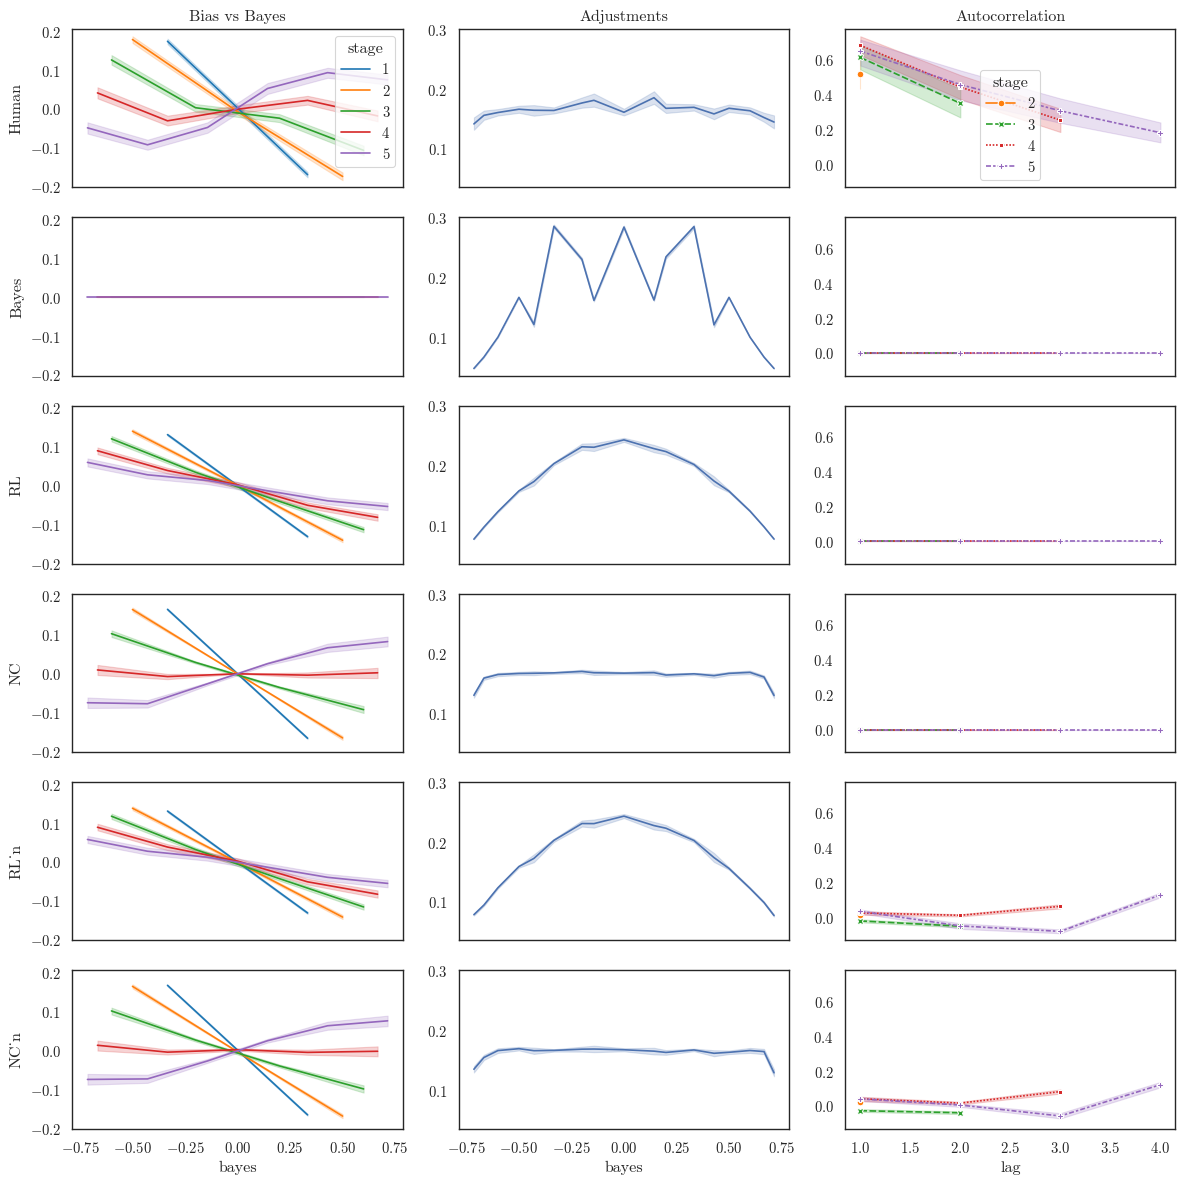

In [11]:
human = pd.read_pickle("data/carrabin.pkl")
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")
rl = pd.read_pickle("data/RL_jan27_dynamics.pkl")
nc = pd.read_pickle("data/NC_jan27_dynamics.pkl")
rl_n = pd.read_pickle("data/RL_n2_jan28_dynamics.pkl")
nc_n = pd.read_pickle("data/NC_n2_jan28_dynamics.pkl")

human['bayes'] = bayes['response']
human['bias'] = human['response'] - human['bayes']
bayes['bayes'] = human['bayes']
bayes['bias'] = bayes['response'] - bayes['response']
rl['bayes'] = human['bayes']
rl['bias'] = rl['response'] - human['bayes']
nc['bayes'] = human['bayes']
nc['bias'] = nc['response'] - human['bayes']
rl_n['bayes'] = human['bayes']
rl_n['bias'] = rl_n['response'] - human['bayes']
nc_n['bayes'] = human['bayes']
nc_n['bias'] = nc_n['response'] - human['bayes']

fig, axes = plt.subplots(nrows=6, ncols=3, sharex='col', sharey='col', figsize=(12,12))
sns.lineplot(data=human, x='bayes', y='bias', hue='stage', ax=axes[0][0], palette=palette)
sns.lineplot(data=bayes, x='bayes', y='bias', hue='stage', ax=axes[1][0], palette=palette)
sns.lineplot(data=rl, x='bayes', y='bias', hue='stage', ax=axes[2][0], palette=palette)
sns.lineplot(data=nc, x='bayes', y='bias', hue='stage', ax=axes[3][0], palette=palette)
sns.lineplot(data=rl_n, x='bayes', y='bias', hue='stage', ax=axes[4][0], palette=palette)
sns.lineplot(data=nc_n, x='bayes', y='bias', hue='stage', ax=axes[5][0], palette=palette)
sns.lineplot(data=human, x='bayes', y='delta response', ax=axes[0][1], palette=palette)
sns.lineplot(data=bayes, x='bayes', y='delta response', ax=axes[1][1], palette=palette)
sns.lineplot(data=rl, x='bayes', y='delta response', ax=axes[2][1], palette=palette)
sns.lineplot(data=nc, x='bayes', y='delta response', ax=axes[3][1], palette=palette)
sns.lineplot(data=rl_n, x='bayes', y='delta response', ax=axes[4][1], palette=palette)
sns.lineplot(data=nc_n, x='bayes', y='delta response', ax=axes[5][1], palette=palette)
sns.lineplot(data=coefficients.query("type=='human'"), x='lag', y='correlation', hue='stage', ax=axes[0][2], palette=palette[1:], markers=True, style='stage')
sns.lineplot(data=coefficients.query("type=='bayes'"), x='lag', y='correlation', hue='stage', ax=axes[2][2], palette=palette[1:], markers=True, style='stage')
sns.lineplot(data=coefficients.query("type=='RL'"), x='lag', y='correlation', hue='stage', ax=axes[1][2], palette=palette[1:], markers=True, style='stage')
sns.lineplot(data=coefficients.query("type=='NC'"), x='lag', y='correlation', hue='stage', ax=axes[3][2], palette=palette[1:], markers=True, style='stage')
sns.lineplot(data=coefficients.query("type=='RL_n2'"), x='lag', y='correlation', hue='stage', ax=axes[4][2], palette=palette[1:], markers=True, style='stage')
sns.lineplot(data=coefficients.query("type=='NC_n2'"), x='lag', y='correlation', hue='stage', ax=axes[5][2], palette=palette[1:], markers=True, style='stage')

axes[0][0].set(ylabel='Human', title='Bias vs Bayes')
axes[1][0].set(ylabel='Bayes')
axes[2][0].set(ylabel='RL')
axes[3][0].set(ylabel='NC')
axes[4][0].set(ylabel='RL_n')
axes[5][0].set(ylabel='NC_n')
axes[0][1].set(ylabel=None, title='Adjustments')
axes[1][1].set(ylabel=None)
axes[2][1].set(ylabel=None)
axes[3][1].set(ylabel=None)
axes[4][1].set(ylabel=None)
axes[5][1].set(ylabel=None)
axes[0][2].set(ylabel=None, title='Autocorrelation')
axes[1][2].set(ylabel=None)
axes[2][2].set(ylabel=None)
axes[3][2].set(ylabel=None)
axes[4][2].set(ylabel=None)
axes[5][2].set(ylabel=None)
axes[1][0].get_legend().remove()
axes[2][0].get_legend().remove()
axes[3][0].get_legend().remove()
axes[4][0].get_legend().remove()
axes[5][0].get_legend().remove()
# axes[1][1].get_legend().remove()
# axes[2][1].get_legend().remove()
# axes[3][1].get_legend().remove()
# axes[4][1].get_legend().remove()
# axes[5][1].get_legend().remove()
axes[1][2].get_legend().remove()
axes[2][2].get_legend().remove()
axes[3][2].get_legend().remove()
axes[4][2].get_legend().remove()
axes[5][2].get_legend().remove()
plt.tight_layout()
plt.show()

In [6]:
a = pd.read_pickle("data/NC_n2_jan28two_params.pkl")
print('mu', a['mu'].mean())
print('sigma', a['sigma'].mean())

mu 0.08311746040282786
sigma 0.012004314800499752


In [7]:
a = pd.read_pickle("data/RL_n2_jan28two_params.pkl")
print('mu', a['mu'].mean())
print('sigma', a['sigma'].mean())

mu 0.20164231226119958
sigma 0.001876343434984486
